In [ ]:
#Connect colab with gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Restoring 01_Data_Adquisition_and_Preprocessing session
import dill
dill.load_session('/content/drive/MyDrive/session.pkl')

### 2. Image Classifier Building

First step to build a image search engine, is to have a trained CNN which could handle imageset and supply predictions.

2.1. CNN build-up

There are several state-of-art CNN for image classification available as VGG-16, but in order to have results quickly, let's build a simple one from scratch.

For this deep learning model we will use keras library in python, using sequential model and trying different layers combination and measuring performance for model improvement.

In [ ]:
#Keras imports, including common used layers and sequential model. 
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [ ]:
#For this model_1, just 3 layers have been added in order to have a quickly output. 
model_1 = Sequential()

model_1.add(Flatten(input_shape=(28,28)))
model_1.add(Dense(units=256, activation='relu'))
model_1.add(Dense(units=10, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


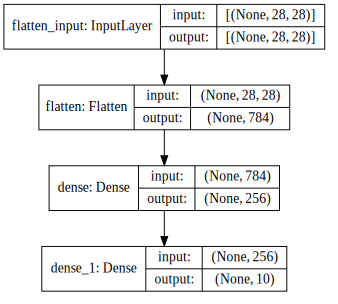

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_1, show_shapes=True, 
                 show_layer_names=True, rankdir='TB', dpi=70).create(prog='dot', format='svg'))

In [ ]:
model_1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(Xtrain,
         ytrain,
         batch_size=64,
         epochs=10,
         validation_data=(Xval, yval))

Epoch 1/10
844/844 [==============================] - 3s 3ms/step - loss: 19.6144 - accuracy: 0.7011 - val_loss: 0.7793 - val_accuracy: 0.7732
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.6750 - accuracy: 0.7822 - val_loss: 0.6231 - val_accuracy: 0.8025
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.5196 - accuracy: 0.8184 - val_loss: 0.5490 - val_accuracy: 0.8340
Epoch 4/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4649 - accuracy: 0.8360 - val_loss: 0.5070 - val_accuracy: 0.8337
Epoch 5/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4564 - accuracy: 0.8380 - val_loss: 0.4848 - val_accuracy: 0.8462
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4327 - accuracy: 0.8491 - val_loss: 0.4557 - val_accuracy: 0.8470
Epoch 7/10
844/844 [==============================] - 2s 2ms/step - loss: 0.4411 - accuracy: 0.8446 - val_loss: 0.4545 - val_accuracy: 0.8497
Epoch

2.2. Plotting Performance

In order to show quickly with plot performance, specifically accuracy and loss for train and validation sets, let's declare a funcition which show both curves in each subplot.

In [ ]:
def plot_performance(history, epochs_no, epochs_step):
  f, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(16, 4))
  t = f.suptitle('Model Performance', fontsize=12)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1,epochs_no+1))
  ax_1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
  ax_1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy', color='red')
  ax_1.set_xticks(np.arange(0, epochs_no+1, epochs_step))
  ax_1.set_ylabel('Accuracy Value')
  ax_1.set_xlabel('Epoch')
  ax_1.set_title('Accuracy')
  l1 = ax_1.legend(loc="best")

  ax_2.plot(epoch_list, history.history['loss'], label='Train Loss')
  ax_2.plot(epoch_list, history.history['val_loss'], label='Validation Loss', color='red')
  ax_2.set_xticks(np.arange(0, epochs_no+1, epochs_step))
  ax_2.set_ylabel('Loss Value')
  ax_2.set_xlabel('Epoch')
  ax_2.set_title('Loss')
  l2 = ax_2.legend(loc="best")

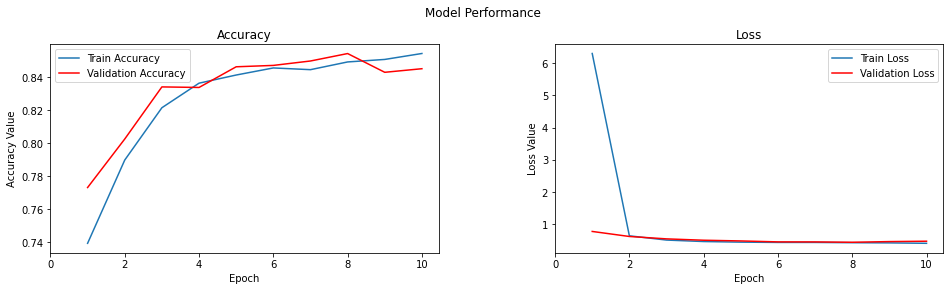

In [ ]:
plot_performance(history_1, 10, 2)

In [ ]:
print(max(history_1.history['val_accuracy']), min(history_1.history['val_loss']))

0.8541666865348816 0.4439581036567688


As seen in results report, although accuracy is 85%, loss value is high (44%).

2.3. Adding features to our CNN

Let's try another model with more features as MaxPooling for downsampling images and Dropout in order to reduce overfitting.  

In [ ]:
from keras.layers import Dropout

In [ ]:
model_2 = Sequential()

#Input_size = 64
model_2.add(Conv2D(filters=64, kernel_size=2, padding='same', 
                 activation='relu', input_shape=(28,28,1))) 
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.3))

model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

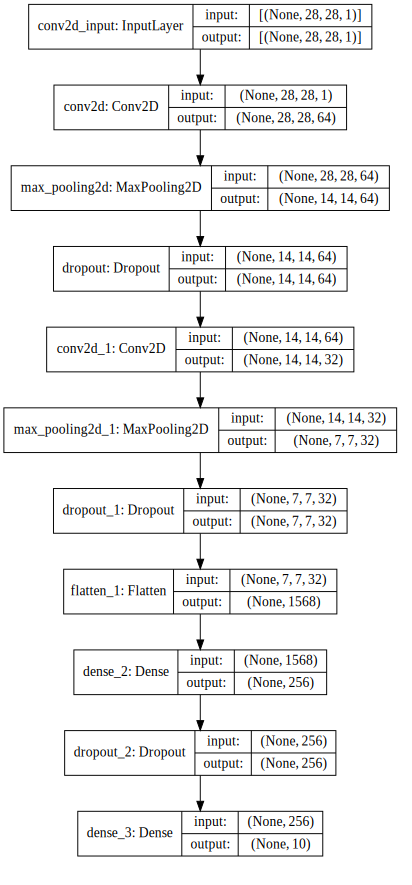

In [ ]:
SVG(model_to_dot(model_2, show_shapes=True, 
                 show_layer_names=True, rankdir='TB', dpi=70).create(prog='dot', format='svg'))

In [ ]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(Xtrain,
         ytrain,
         batch_size=64,
         epochs=10,
         validation_data=(Xval, yval))

Epoch 1/10
844/844 [==============================] - 6s 5ms/step - loss: 5.2868 - accuracy: 0.5397 - val_loss: 0.5132 - val_accuracy: 0.8187
Epoch 2/10
844/844 [==============================] - 4s 4ms/step - loss: 0.6375 - accuracy: 0.7605 - val_loss: 0.4302 - val_accuracy: 0.8338
Epoch 3/10
844/844 [==============================] - 4s 4ms/step - loss: 0.5462 - accuracy: 0.7932 - val_loss: 0.3953 - val_accuracy: 0.8532
Epoch 4/10
844/844 [==============================] - 4s 4ms/step - loss: 0.5017 - accuracy: 0.8100 - val_loss: 0.3419 - val_accuracy: 0.8782
Epoch 5/10
844/844 [==============================] - 4s 4ms/step - loss: 0.4568 - accuracy: 0.8283 - val_loss: 0.3367 - val_accuracy: 0.8725
Epoch 6/10
844/844 [==============================] - 4s 4ms/step - loss: 0.4309 - accuracy: 0.8421 - val_loss: 0.3060 - val_accuracy: 0.8920
Epoch 7/10
844/844 [==============================] - 4s 4ms/step - loss: 0.4073 - accuracy: 0.8503 - val_loss: 0.2997 - val_accuracy: 0.8930
Epoch 

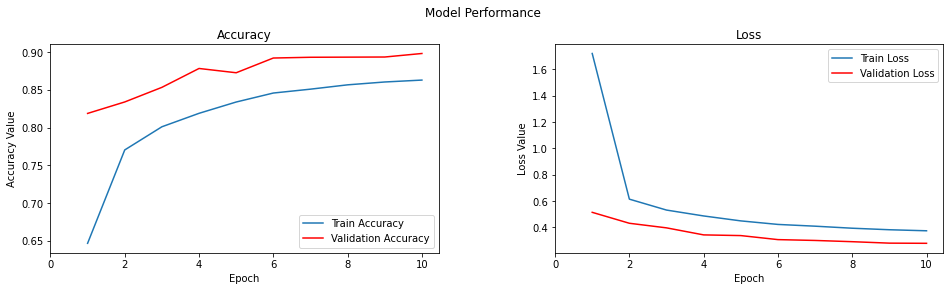

In [ ]:
plot_performance(history_2, 10, 2)

2.3. Show random prediction 

Once the model_2 is fitted, let's plot one random prediction just to look&feel performance of the model output.



In [ ]:
import random

Text(0.5, 1.0, 'Dress')

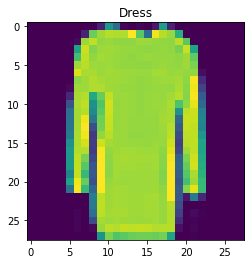

In [ ]:
predictions = model_2.predict(Xtest)
value = random.sample(range(10000),1)
predict_labl = np.argmax(predictions[value])
title = categ_df.Description[predict_labl]
plt.imshow(Xtest[value].reshape(28,28))
plt.title(title)

Accordingly, we can extend plotting predictions declaring a function which create predictions and plot them. 

In [ ]:
#function which provided squared mosaic of 
def predict_plot(model,img_set,grid_height,
                 grid_width):
  
  prediction = model.predict(img_set)
  k = int(grid_height*grid_width)
  sample_batch = len(img_set)
  random_index = np.array(random.sample(range(sample_batch), k)).reshape(grid_height, grid_width)
  f, ax = plt.subplots(grid_height, grid_width, figsize=(10,10))

  for i in range(0, len(random_index[0])):
    for j in range(0, len(random_index)):
      label_predicted = np.argmax(predictions[random_index[i][j]])

      ax[i][j].set_title(categ_df.Description[label_predicted])
      ax[i][j].imshow(img_set[random_index[i][j]].reshape(28,28))


  

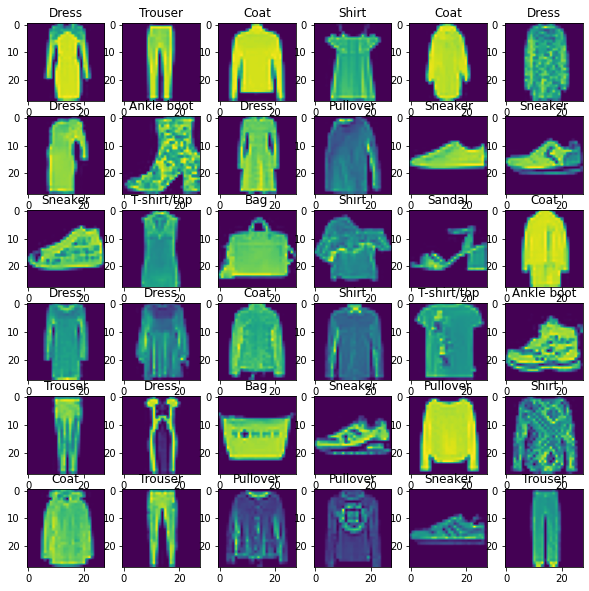

In [ ]:
predict_plot(model_2, Xtest, 6,6)

In [ ]:
!mkdir -p '/content/drive/MyDrive/saved_model'

In [ ]:
!ls '/content/drive/MyDrive'

 01_Intro_Deep_Learning_before_class.ipynb   saved_model
 02_mnist_digits_before_class.ipynb	     session.pkl
 03_imdb_reviews_before_class.ipynb	     Transferlearning
'Colab Notebooks'			     zalando
 deep_learning				     Zalando_dataset.zip


In [ ]:
model_2.save('/content/drive/MyDrive/saved_model/model_2.h5') 

In [ ]:
!ls '/content/drive/MyDrive/saved_model'

model_2.h5
